<a href="https://colab.research.google.com/github/maisa-guimaraes/P4/blob/main/INOVA2024/Munic%C3%ADpios_nordestinos_que_come%C3%A7am_com_vogais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install selenium

In [21]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import time
import requests
import matplotlib.pyplot as plt

In [22]:
url = 'https://pt.wikipedia.org/wiki/Lista_das_unidades_federativas_da_Regi%C3%A3o_Nordeste_do_Brasil'

tabelas = pd.read_html(url) # pd.read_html(url) serve para ler tabelas html e convertê-las em dataframes.

print(f'Total de tabelas encontradas: {len(tabelas)}')
print(50*'-')
df = tabelas[0] # Para escolher a primeira tabela da página
print(df)

Total de tabelas encontradas: 3
--------------------------------------------------
   Bandeira               Estado Abreviação      Capital         Área  \
0       NaN              Alagoas         AL       Maceió   27.848,140   
1       NaN                Bahia         BA     Salvador  564.733,177   
2       NaN                Ceará         CE    Fortaleza  148.920,472   
3       NaN             Maranhão         MA     São Luís  331.937,450   
4       NaN              Paraíba         PB  João Pessoa   56.469,778   
5       NaN           Pernambuco         PE       Recife   98.148,323   
6       NaN                Piauí         PI     Teresina  251.577,738   
7       NaN  Rio Grande do Norte         RN        Natal   52.811,047   
8       NaN              Sergipe         SE      Aracaju   21.915,081   

  População(censo 2022) Densidade(2010) PIB 2015 (% total do país)  \
0                   [1]       112,33[1]         46.364.000 (0,77%)   
1                   [2]        24,82[2]       

In [23]:
siglas = df['Abreviação']
print(siglas)

0    AL
1    BA
2    CE
3    MA
4    PB
5    PE
6    PI
7    RN
8    SE
Name: Abreviação, dtype: object


In [24]:
cidades_ne_vogais = []
estados_cidades_ne_vogais = []

for UF in siglas:
    url = f'https://servicodados.ibge.gov.br/api/v1/localidades/estados/{UF}/municipios'
    response = requests.get(url)
    estados_municipios = response.json()
    for municipio in estados_municipios:
      if municipio['nome'][0] in ('aeiouAEIOU'): # nome refere-se ao nome do município, sendo assim especificado no JSON.
        cidades_ne_vogais.append(municipio['nome']) # Se iniciado por vogal o nome do município é adicionado à lista
        estados_cidades_ne_vogais.append(UF) # Se o nome do município for iniciado por vogal, adiciona-se mais um à contagem por estado.

print('O total de municípios da região nordeste que começam com vogais é',len(cidades_ne_vogais))

print('\n' + 100 * '-' + '\n')

df_municipios = pd.DataFrame({
    'Municipio': cidades_ne_vogais,
    'Estado': estados_cidades_ne_vogais
})

df_municipios = df_municipios.sort_values(by='Municipio').reset_index(drop=True)

with pd.option_context('display.max_rows', None,):
  df_municipios.index = df_municipios.index + 1
  print(df_municipios)

O total de municípios da região nordeste que começam com vogais é 333

----------------------------------------------------------------------------------------------------

                   Municipio Estado
1                    Abaiara     CE
2                      Abaré     BA
3                     Abaíra     BA
4               Abreu e Lima     PE
5                  Acajutiba     BA
6                    Acarape     CE
7                     Acaraú     CE
8                      Acari     RN
9                      Acauã     PI
10                  Acopiara     CE
11                  Adustina     BA
12     Afogados da Ingazeira     PE
13            Afonso Bezerra     RN
14              Afonso Cunha     MA
15                   Afrânio     PE
16                 Agrestina     PE
17              Agricolândia     PI
18                    Aguiar     PB
19                   Aiquara     BA
20                    Aiuaba     CE
21             Alagoa Grande     PB
22               Alagoa Nova     PB

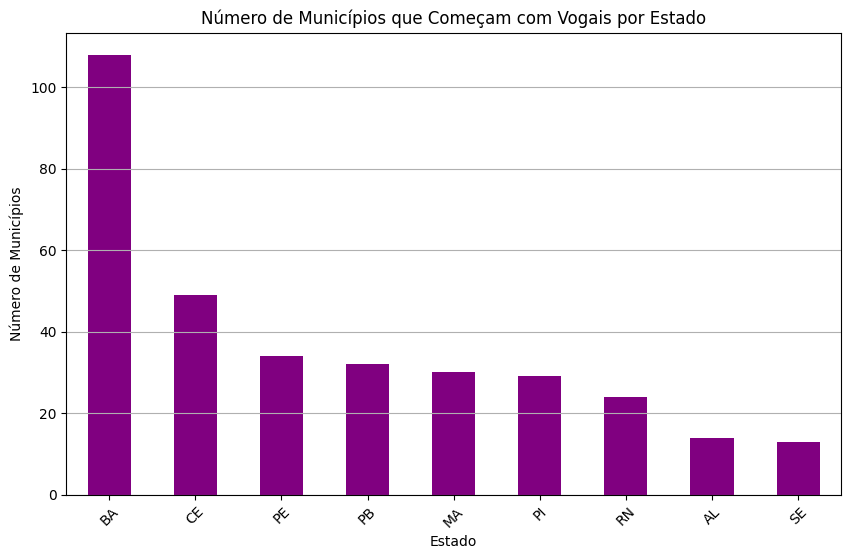

In [25]:
municipios_por_estado = df_municipios['Estado'].value_counts()

plt.figure(figsize=(10, 6))
municipios_por_estado.plot(kind='bar', color='purple')
plt.title('Número de Municípios que Começam com Vogais por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [31]:
print(municipios_por_estado)

Estado
BA    108
CE     49
PE     34
PB     32
MA     30
PI     29
RN     24
AL     14
SE     13
Name: count, dtype: int64
